In [37]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
#df.drop(['id'], 1, inplace=True)
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

print(accuracy)

# example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
# example_measures = example_measures.reshape(len(example_measures), -1)
# prediction = clf.predict(example_measures)
# print(prediction)


0.6571428571428571


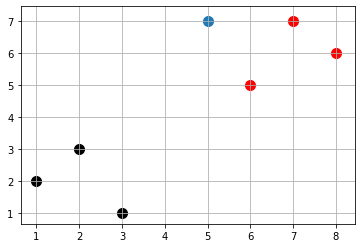

In [6]:
#programmed knn
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from collections import Counter

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            #using math library
            #euclidean_distance = sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2)
            #using numpy library
            #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            #using numpy norm
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.grid(True)
plt.show()

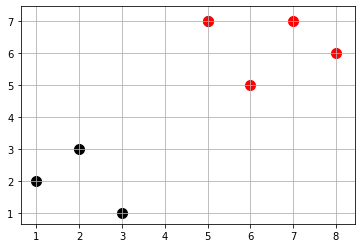

In [7]:
#programmed knn
import numpy as np
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from collections import Counter

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            #using math library
            #euclidean_distance = sqrt((features[0]-predict[0])**2 + (features[1]-predict[1])**2)
            #using numpy library
            #euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            #using numpy norm
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.grid(True)

#prediction
result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)

plt.show()

In [12]:
#improvise knn model used in breast cancer dataset
import numpy as np 
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
            
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

#import dataset, replace nans with 99999, covert data to list of lists, format to float
df = pd.read_csv('datasets/breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

#shuffle data
random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

#create seperate dictionaries for train and test sets
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1

print('Accuracy: ', correct/total)

Accuracy:  0.9928057553956835
